# A Basic Statistical Model in PyTorch

[link](https://ut.philkr.net/deeplearning/introduction/a_basic_statistical_model_in_pytorch/)

## Nearest Neighbors

$f:R \rightarrow \{0, 1\}$
- find closest $x$ in data
- return corresponding $y$

In [1]:
import torch
import torchvision
from PIL import Image


In [2]:
size = (128, 128)
transfrorm = torchvision.transforms.Compose([torchvision.transforms.Resize(size),torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102(root='../raw_data', split = 'train', transform=transfrorm, download=True))
test_dataset = list(torchvision.datasets.Flowers102(root='../raw_data', split = 'test', transform=transfrorm, download=True))

## Image Visualization

In [3]:
def visualize_image(img: torch.Tensor) -> Image.Image:
    img = 255 * img.permute(1, 2, 0)
    img_np = img.byte().cpu().numpy() # type: ignore
    return Image.fromarray(img_np) # type: ignore

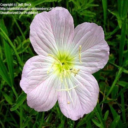

In [4]:
visualize_image(train_dataset[1][0])

#### Input shape

In [5]:
train_dataset[1][0].shape

torch.Size([3, 128, 128])

#### Label

In [6]:
train_dataset[101][1]

10

## Visualize data

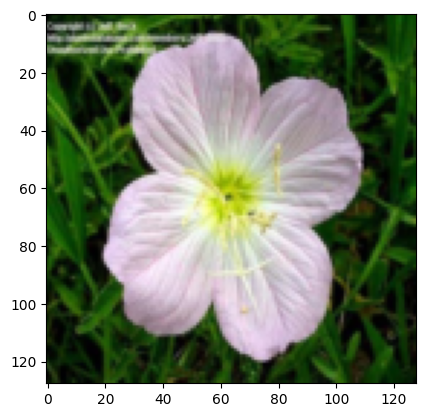

In [7]:
import matplotlib.pyplot as plt
plt.imshow(visualize_image(train_dataset[1][0]))

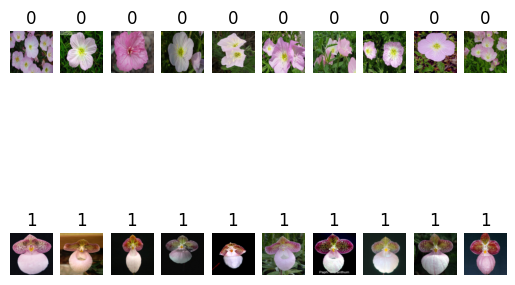

In [8]:
f, ax = plt.subplots(2, 10)
for i, (img,l) in enumerate(train_dataset[:20]):
    ax[i//10, i%10].imshow(visualize_image(img))
    ax[i//10, i%10].set_title(l)
    ax[i//10, i%10].axis('off')
plt.show()

In [9]:
class_01 = train_dataset[:20]

In [10]:
len(class_01)

20

In [11]:
def nn_classifier(x: torch.Tensor) -> int:
    dist = [((x-img).pow(2).sum(),l) for img, l in class_01] 
    return min(dist)[1]

nn_classifier(test_dataset[0][0])

1

In [12]:
accuracy = sum(1 for img, l in test_dataset[:20] if nn_classifier(img) == l) / 20
accuracy

0.4

In [13]:
[l for _, l in test_dataset[:20]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## K-Nearest Neighbors

$f:R \rightarrow \{0, 1\}$
- find closest $x$ in data
- find $k$-closest datapoints in the dataset $\mathcal{D}$
- return most common label

In [14]:
def knn_classifier(x: torch.Tensor,k:int) -> int:
    dist = [((x-img).pow(2).sum(),l) for img, l in class_01]
    k_closest= [l for _, l in sorted(dist)[:k]]
    return sorted(k_closest)[k//2]

knn_classifier(test_dataset[0][0],k = 3)

1

In [15]:
accuracy = sum(1 for img, l in test_dataset[:20] if knn_classifier(img,k=3) == l) / 20
accuracy

0.5

## K-Nearest Neighbors Regression

$f:R \rightarrow \{0, 1\}$
- find closest $x$ in data
- find $k$-closest datapoints in the dataset $\mathcal{D}$
- return average value

In [16]:
from statistics import mean
def knn_regressor(x: torch.Tensor,k:int) -> int:
    dist = [((x-img).pow(2).sum(),l) for img, l in class_01]
    k_closest= [l for _, l in sorted(dist)[:k]]
    return mean(k_closest)

In [17]:
knn_regressor(test_dataset[3][0],k=3)

0.6666666666666666